### EDA and DATA CLEANING

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# defining stylesheet for all figures in notebook
plt.style.use('gstyle.mplstyle')
 
# to view all columns and names 
pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

In [3]:
#env1 = pd.read_csv('../raw_data/calenviroscreendatav11.xls')
#env2 = pd.read_csv('../raw_data/calenviroscreen2-final-report.csv')
env3 = pd.read_csv('../raw_data/calenviroscreen-3.0-results-june-2018-update.csv')
#env4 = pd.read_csv('../raw_data/calenviroscreen40resultsdatadictionary_F_2021.xlsx') 

In [4]:
#env1.shape, env2.shape, 
env3.shape

(8035, 57)

In [5]:
env3.columns = env3.columns.str.lower()
env3.columns

Index(['census tract', 'total population', 'california county', 'zip',
       'nearby city \n(to help approximate location only)', 'longitude',
       'latitude', 'ces 3.0 score', ' ces 3.0 percentile',
       'ces 3.0 \npercentile range', 'sb 535 disadvantaged community', 'ozone',
       'ozone pctl', 'pm2.5', 'pm2.5 pctl', 'diesel pm', 'diesel pm pctl',
       'drinking water', 'drinking water pctl', 'pesticides',
       'pesticides pctl', 'tox. release', 'tox. release pctl', 'traffic',
       'traffic pctl', 'cleanup sites', 'cleanup sites pctl',
       'groundwater threats', 'groundwater threats pctl', 'haz. waste',
       'haz. waste pctl', 'imp. water bodies', 'imp. water bodies pctl',
       'solid waste', 'solid waste pctl', 'pollution burden',
       'pollution burden score', 'pollution burden pctl', 'asthma',
       'asthma pctl', 'low birth weight', 'low birth weight pctl',
       'cardiovascular disease', 'cardiovascular disease pctl', 'education',
       'education pctl', 

In [39]:
df3 = env3[['census tract', 'total population', 'ozone', 'pm2.5', 'diesel pm', 'drinking water', 
       'pesticides','tox. release', 'traffic', 'cleanup sites', 'groundwater threats', 'haz. waste', 
       'imp. water bodies', 'solid waste', 'pollution burden', 'asthma', 'low birth weight', 
       'cardiovascular disease', 'education', 'poverty']]

In [40]:
df3.head()

,census tract,total population,ozone,pm2.5,diesel pm,drinking water,pesticides,tox. release,traffic,cleanup sites,groundwater threats,haz. waste,imp. water bodies,solid waste,pollution burden,asthma,low birth weight,cardiovascular disease,education,poverty
0,6019001100,3174,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,79.96,131.64,7.44,14.13,53.3,76.3
1,6071001600,6133,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,81.19,60.66,7.04,12.94,53.3,72.5
2,6019000200,3167,0.062,15.40,47.445,681.20,3.03,12454.948410,576.52,22.0,30.25,0.200,0,2.50,71.16,142.12,10.16,14.96,42.3,86.8
3,6077000801,6692,0.046,12.54,24.117,278.76,12.93,2387.782922,1305.01,50.1,132.10,0.795,19,27.00,74.48,142.17,6.23,14.72,40.8,61.3
4,6019001500,2206,0.065,15.40,18.846,1000.24,3518.41,21790.706720,435.16,60.0,54.20,13.100,0,50.80,80.20,90.48,4.50,12.82,45.1,66.4


In [41]:
# df3.duplicated().sum()

In [42]:
df3.isnull().sum()

census tract                0
total population            0
ozone                       0
pm2.5                      19
diesel pm                   0
drinking water             18
pesticides                  0
tox. release                0
traffic                    56
cleanup sites               0
groundwater threats         0
haz. waste                  0
imp. water bodies           0
solid waste                 0
pollution burden            0
asthma                      0
low birth weight          222
cardiovascular disease      0
education                  96
poverty                    79
dtype: int64

### Dropping row/observations with any `null` values, NOT replacing with any measure of central tendency. 

In [43]:
df3.dropna(subset=['pm2.5', 'drinking water', 'traffic', 'education', 'poverty'], inplace = True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [44]:
df3.isnull().sum()

census tract                0
total population            0
ozone                       0
pm2.5                       0
diesel pm                   0
drinking water              0
pesticides                  0
tox. release                0
traffic                     0
cleanup sites               0
groundwater threats         0
haz. waste                  0
imp. water bodies           0
solid waste                 0
pollution burden            0
asthma                      0
low birth weight          118
cardiovascular disease      0
education                   0
poverty                     0
dtype: int64

In [45]:
df3.describe()

,census tract,total population,ozone,pm2.5,diesel pm,drinking water,pesticides,tox. release,traffic,cleanup sites,groundwater threats,haz. waste,imp. water bodies,solid waste,pollution burden,asthma,low birth weight,cardiovascular disease,education,poverty
count,7.844000e+03,7844.000000,7844.000000,7844.000000,7844.000000,7844.0000,7844.000000,7844.000000,7844.000000,7844.000000,7844.000000,7844.000000,7844.000000,7844.000000,7844.000000,7844.000000,7726.000000,7844.000000,7844.000000,7844.000000
mean,6.055020e+09,4677.967746,0.047473,10.383786,19.202724,473.4731,318.081989,3187.973748,945.919898,8.266337,15.459153,0.435500,3.262621,2.229162,42.062611,52.357708,4.980525,8.311414,19.119939,36.439011
std,2.654196e+07,1937.447703,0.010244,2.592224,16.566175,249.7753,2800.067966,12648.111445,910.521778,16.341448,35.312254,1.382262,4.479301,4.677135,12.703238,30.505296,1.549996,2.945283,15.923354,20.281136
min,6.001400e+09,76.000000,0.026000,1.651081,0.021000,6.9200,0.000000,0.000000,22.410000,0.000000,0.000000,0.000000,0.000000,0.000000,8.370000,3.630000,0.000000,1.040000,0.000000,1.000000
25%,6.037264e+09,3387.750000,0.040000,8.697944,8.949250,250.0200,0.000000,97.911800,443.650000,0.000000,0.300000,0.000000,0.000000,0.000000,32.407500,30.257500,3.960000,6.140000,6.300000,19.200000
50%,6.059063e+09,4435.500000,0.046000,10.370000,16.530000,479.2300,0.000000,479.039992,701.785000,2.000000,5.750000,0.050000,1.000000,0.200000,41.955000,45.560000,4.920000,7.985000,14.000000,33.600000
75%,6.073016e+09,5668.000000,0.055000,12.050000,24.623500,664.0700,0.370000,3508.795484,1195.682500,10.200000,17.850000,0.225000,6.000000,2.300000,51.072500,66.280000,5.930000,10.080000,28.600000,51.600000
max,6.115041e+09,37452.000000,0.068000,19.600000,208.400000,1245.6500,91316.190000,842751.329300,45687.870000,323.750000,1610.250000,25.555000,34.000000,97.800000,81.190000,278.830000,14.890000,21.260000,80.000000,95.200000


In [46]:
df3.drop_duplicates(keep='last')

,census tract,total population,ozone,pm2.5,diesel pm,drinking water,pesticides,tox. release,traffic,cleanup sites,groundwater threats,haz. waste,imp. water bodies,solid waste,pollution burden,asthma,low birth weight,cardiovascular disease,education,poverty
0,6019001100,3174,0.065,15.400000,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,79.96,131.64,7.44,14.13,53.3,76.3
1,6071001600,6133,0.062,13.310000,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,81.19,60.66,7.04,12.94,53.3,72.5
2,6019000200,3167,0.062,15.400000,47.445,681.20,3.03,12454.948410,576.52,22.0,30.25,0.200,0,2.50,71.16,142.12,10.16,14.96,42.3,86.8
3,6077000801,6692,0.046,12.540000,24.117,278.76,12.93,2387.782922,1305.01,50.1,132.10,0.795,19,27.00,74.48,142.17,6.23,14.72,40.8,61.3
4,6019001500,2206,0.065,15.400000,18.846,1000.24,3518.41,21790.706720,435.16,60.0,54.20,13.100,0,50.80,80.20,90.48,4.50,12.82,45.1,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,6065043814,905,0.068,9.955483,15.700,387.74,0.00,278.092988,1171.13,0.0,0.00,0.000,0,0.00,33.10,45.62,NaN,17.38,8.7,33.1
8016,6037920026,419,0.062,9.117123,1.559,664.89,0.17,20.118462,296.21,0.0,0.00,0.000,1,0.00,25.47,17.02,NaN,7.54,31.8,40.5
8018,6043000400,1802,0.057,4.506147,0.056,457.61,0.00,0.000006,92.15,6.5,12.30,0.000,0,7.50,25.16,27.68,NaN,6.68,5.4,38.4
8028,6079012800,1107,0.042,8.243974,2.678,349.27,2.16,4.072800,169.01,0.0,0.00,0.000,2,1.00,18.45,39.64,NaN,6.37,53.3,48.2


In [47]:
df3.shape # from 8035, lost 191

(7844, 20)

### Addressing Collinearity and Correalation: 


In [23]:
# sns.pairplot(df3)

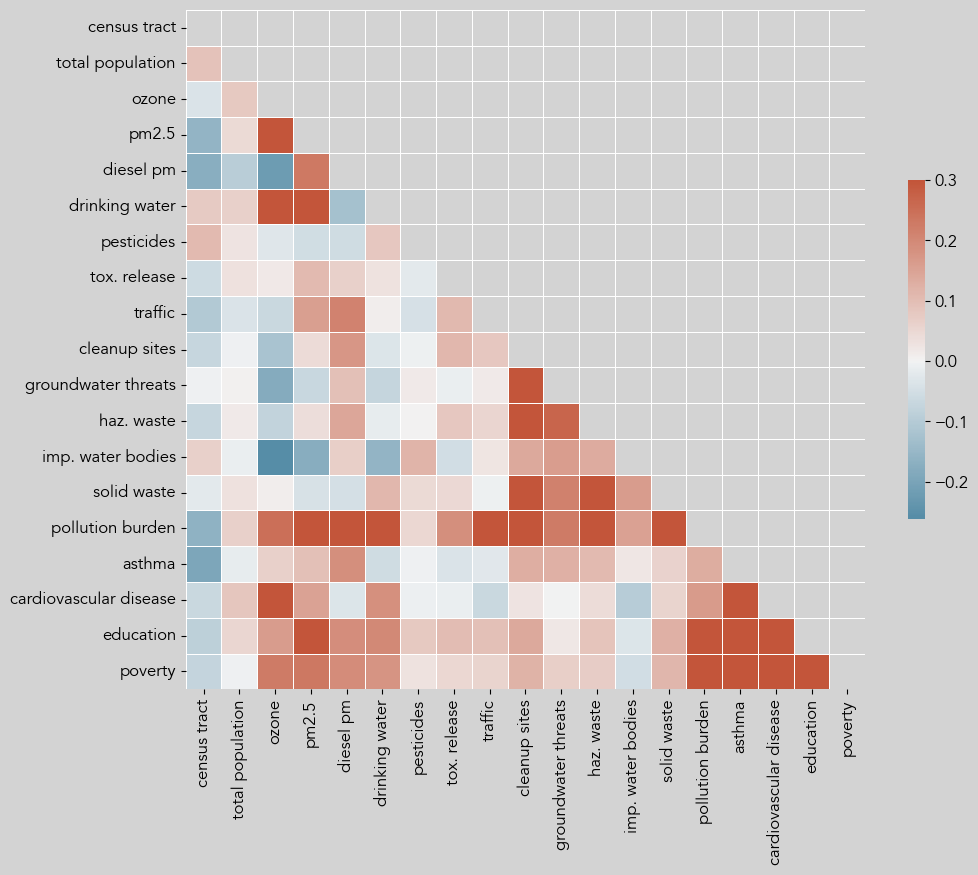

In [15]:
# code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# co linearity

corr = df3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

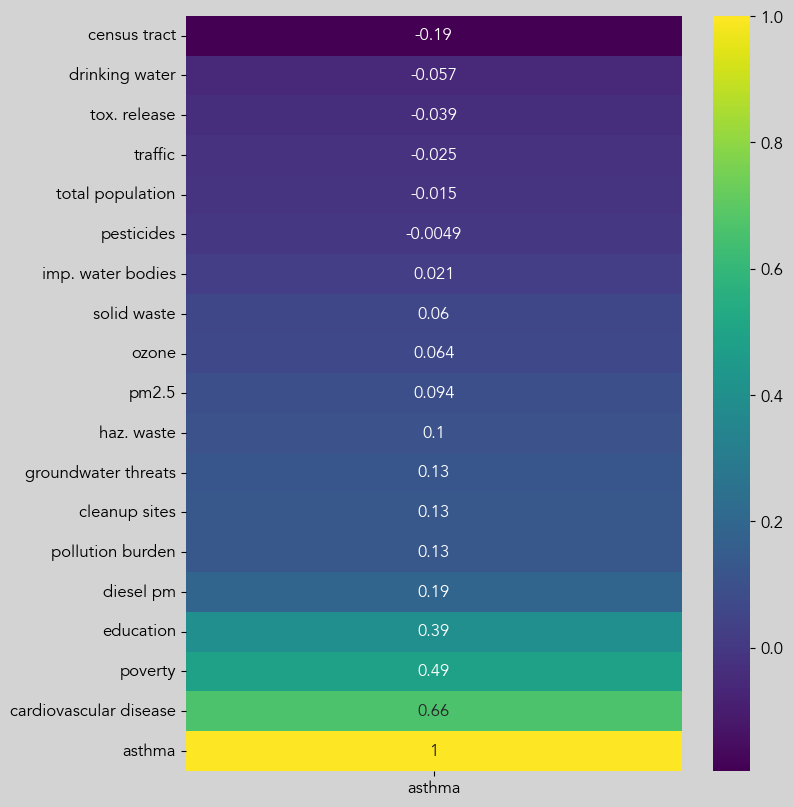

In [16]:
# correalation plot to select features of interest

f, ax = plt.subplots(figsize=(8, 10));

corr = df3.corr()[['asthma']].sort_values('asthma')
sns.heatmap(corr, annot = True, cmap = 'viridis');

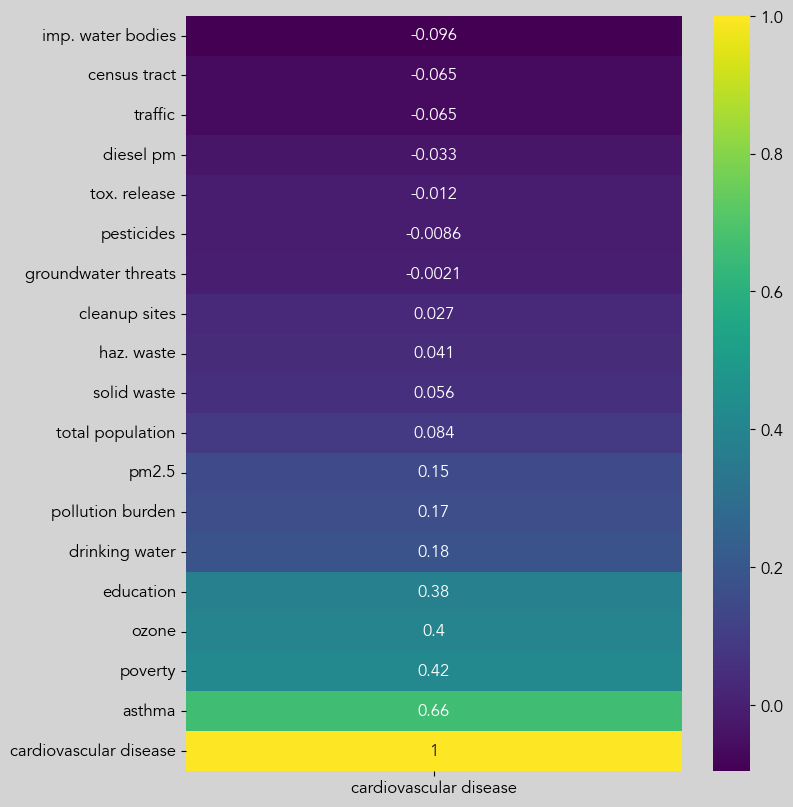

In [17]:
# correalation plot to select features of interest

f, ax = plt.subplots(figsize=(8, 10));

corr = df3.corr()[['cardiovascular disease']].sort_values('cardiovascular disease')
sns.heatmap(corr, annot = True, cmap = 'viridis');

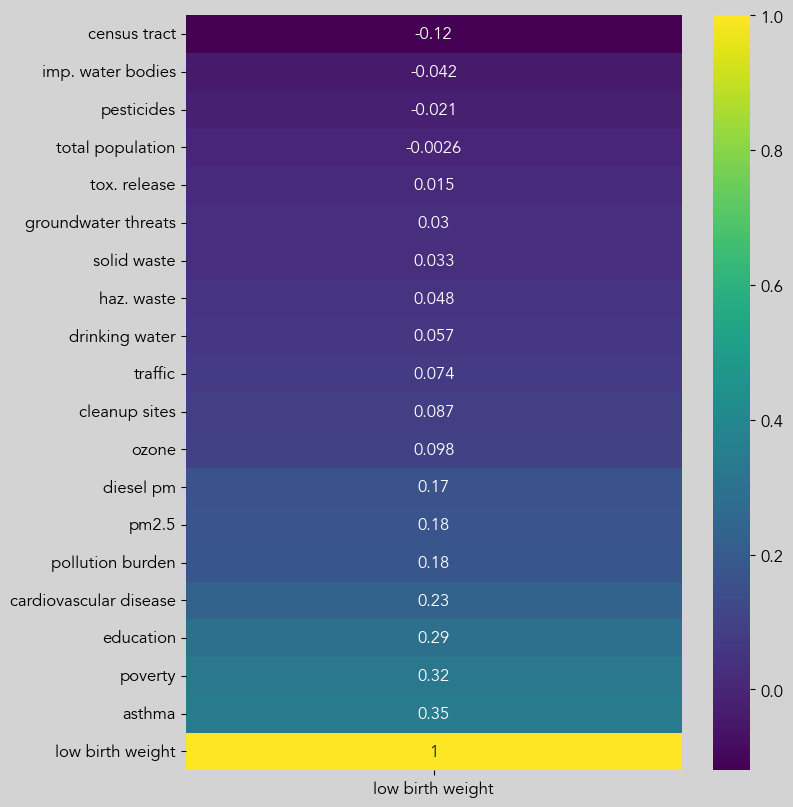

In [49]:
# correalation plot to select features of interest

f, ax = plt.subplots(figsize=(8, 10));

corr = df3.corr()[['low birth weight']].sort_values('low birth weight')
sns.heatmap(corr, annot = True, cmap = 'viridis');

### Plots for preliminary analysis: 

In [50]:
df3.columns

Index(['census tract', 'total population', 'ozone', 'pm2.5', 'diesel pm',
       'drinking water', 'pesticides', 'tox. release', 'traffic',
       'cleanup sites', 'groundwater threats', 'haz. waste',
       'imp. water bodies', 'solid waste', 'pollution burden', 'asthma',
       'low birth weight', 'cardiovascular disease', 'education', 'poverty'],
      dtype='object')

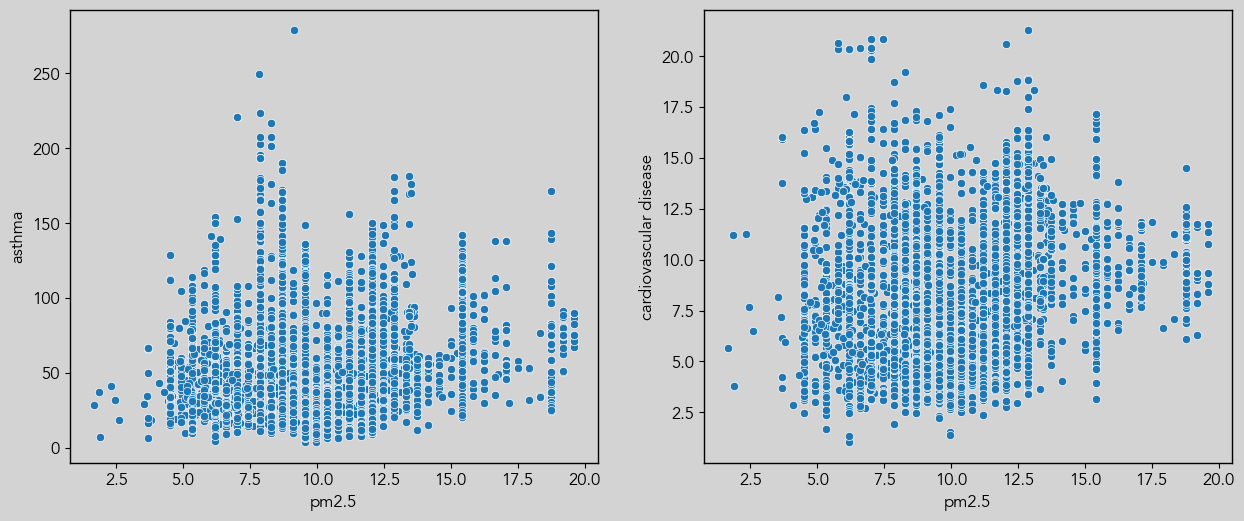

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

#fig.suptitle('More EDA')

x = 'pm2.5'
y = 'cardiovascular disease'
y2 = 'asthma'
sns.scatterplot(data = df3, 
        x = x, 
        y = y2, 
        ax = ax[0], 
        palette = 'colorblind'
        );

sns.scatterplot(data = df3, 
        x = x, 
        y = y, 
        ax = ax[1], 
        palette = 'colorblind'
        );
#sns.scatterplot(y=sf['grla_sf'], x=sf['1f_sf'], data = prices, ax = ax[2], color = 'salmon');  

at high `pm 2.5`, the 'baseline' *asthma* (Age-adjusted rate of emergency department visits for asthma) and *cardiovascular* (Age-adjusted rate of emergency department visits for heart attacks per 10,000) is higher. 

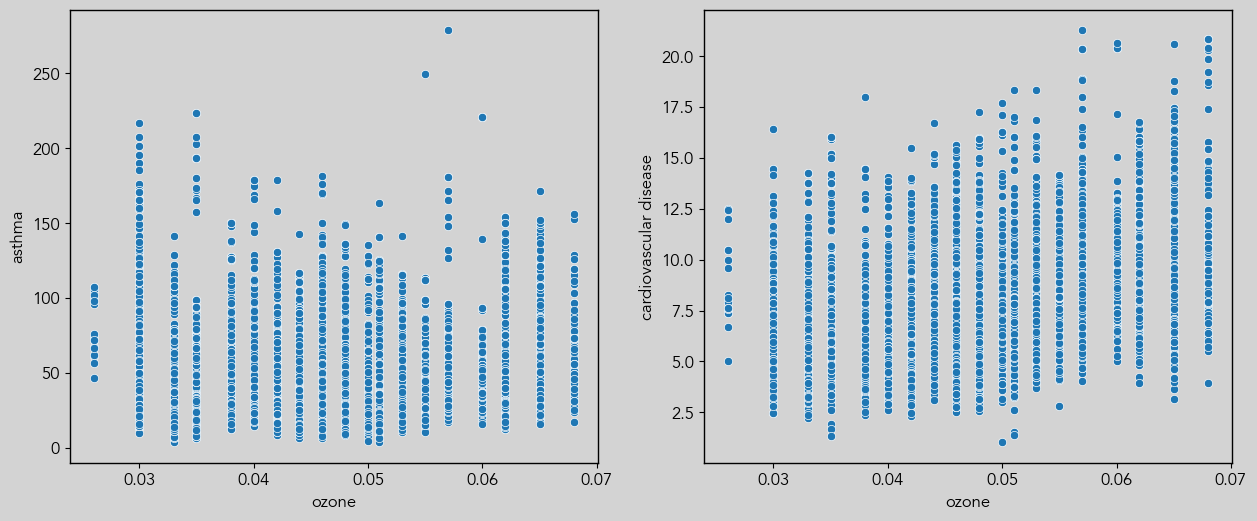

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

#fig.suptitle('More EDA')

x = 'ozone'
y = 'cardiovascular disease'
y2 = 'asthma'
sns.scatterplot(data = df3, 
        x = x, 
        y = y2, 
        ax = ax[0], 
        palette = 'colorblind'
        );

sns.scatterplot(data = df3, 
        x = x, 
        y = y, 
        ax = ax[1], 
        palette = 'colorblind'
        );
#sns.scatterplot(y=sf['grla_sf'], x=sf['1f_sf'], data = prices, ax = ax[2], color = 'salmon');  

at high `ozone`, the 'baseline' *cardiovascular* (Age-adjusted rate of emergency department visits for heart attacks per 10,000) is higher, but visually no effect on asthma hospital visits.

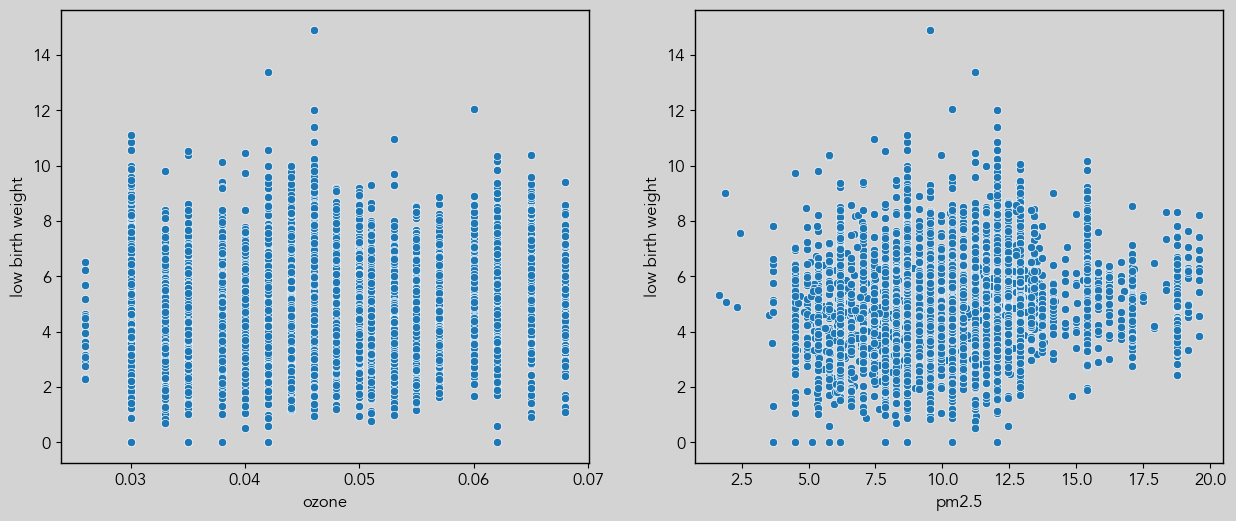

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

#fig.suptitle('More EDA')

x = 'low birth weight'
y = 'ozone'
y2 = 'pm2.5'
sns.scatterplot(data = df3, 
        x = y, 
        y = x, 
        ax = ax[0], 
        palette = 'colorblind'
        );

sns.scatterplot(data = df3, 
        x = y2, 
        y = x, 
        ax = ax[1], 
        palette = 'colorblind'
        );
#sns.scatterplot(y=sf['grla_sf'], x=sf['1f_sf'], data = prices, ax = ax[2], color = 'salmon');  

at high `pm 2.5`, the 'baseline' *low birth weight* (Percent low birth weight) is higher.

In [38]:
# plt.figure(figsize=(15,6))

# x='ozone' 
# y='cardiovascular disease'
# sns.scatterplot( data = df3, 
#         x=x, 
#         y=y);

<br>

Col 1     | Col 2
---         | ---     
C           | bb        
A           | cc
B	        | dd